# Text Clustering 

## Loading the data

In [1]:
from glob import iglob #function returns an interator (data is not stored in memory at the same time)
#of files in a directory using shell pattern matching

In [2]:
#List all text files from the Health-Tweets folder
file_list = list(iglob('Health-Tweets/*.txt'))
file_list

['Health-Tweets\\bbchealth.txt',
 'Health-Tweets\\cbchealth.txt',
 'Health-Tweets\\cnnhealth.txt',
 'Health-Tweets\\everydayhealth.txt',
 'Health-Tweets\\foxnewshealth.txt',
 'Health-Tweets\\gdnhealthcare.txt',
 'Health-Tweets\\goodhealth.txt',
 'Health-Tweets\\KaiserHealthNews.txt',
 'Health-Tweets\\latimeshealth.txt',
 'Health-Tweets\\msnhealthnews.txt',
 'Health-Tweets\\NBChealth.txt',
 'Health-Tweets\\nprhealth.txt',
 'Health-Tweets\\nytimeshealth.txt',
 'Health-Tweets\\reuters_health.txt',
 'Health-Tweets\\usnewshealth.txt',
 'Health-Tweets\\wsjhealth.txt']

In [3]:
# Find files using regular wildcards and iterate over them
for file in iglob('Health-Tweets/*.txt'):
    print(file)

Health-Tweets\bbchealth.txt
Health-Tweets\cbchealth.txt
Health-Tweets\cnnhealth.txt
Health-Tweets\everydayhealth.txt
Health-Tweets\foxnewshealth.txt
Health-Tweets\gdnhealthcare.txt
Health-Tweets\goodhealth.txt
Health-Tweets\KaiserHealthNews.txt
Health-Tweets\latimeshealth.txt
Health-Tweets\msnhealthnews.txt
Health-Tweets\NBChealth.txt
Health-Tweets\nprhealth.txt
Health-Tweets\nytimeshealth.txt
Health-Tweets\reuters_health.txt
Health-Tweets\usnewshealth.txt
Health-Tweets\wsjhealth.txt


In [4]:
df = [] 

In [5]:
# pandas dataframe (built on NumPy) 
import pandas as pd

In [6]:
def read_files(all_files):
    """Reads text files and combines them in one dataframe"""
    for file_ in file_list:
        df = pd.concat((pd.read_csv(f,                                                  
                        sep='|',                                  # Use | as a separator 
                        header=None,                              # no header
                        names=['id', 'datetime', 'tweet'],        # three fields   
                        error_bad_lines=False,                    #ignore innapropriately formated lines
                        encoding='latin-1')) for f in all_files)  # use latin - 1 encoding 
    return df


In [7]:
#Read the first 8 files (half of the data set) and output as one data frame
df = read_files(file_list[:7])
df.shape #check size of the data frame


(27738, 3)

In [8]:
#Look at the first 7 records in the dataframe
df.head(7)

,id,datetime,tweet
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...
5,585733482413891584,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager http://bbc....
6,585733481608646657,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to d..."


In [9]:
#Display the last 7 records in the dataframe
df.tail(7)

,id,datetime,tweet
7770,80654575278895105,Tue Jun 14 15:15:23 +0000 2011,15 healthy-eating tips for people with #Crohns...
7771,80641899744067584,Tue Jun 14 14:25:01 +0000 2011,RT @Cooking_Light: Smart snack: Greek yogurt o...
7772,80629372100415488,Tue Jun 14 13:35:14 +0000 2011,Living With Pets May Protect Infants From Alle...
7773,80629263631527936,Tue Jun 14 13:34:49 +0000 2011,@SarahCampus We know the feeling! Here are som...
7774,80390283203842048,Mon Jun 13 21:45:11 +0000 2011,The Simple Secret to Great Sleep
7775,80371370009174016,Mon Jun 13 20:30:02 +0000 2011,Hot days call for refreshing drinks. Whip up t...
7776,80352600800763904,Mon Jun 13 19:15:27 +0000 2011,RT @MSNHealth: The Mediterranean? The Volumetr...


## Functions and preparations for data cleaning
### Before cleaning the data, install spacy (using neural networks for natural language processing)
by running: 
`conda install spacy` 
`python -m spacy download en_core_web_sm`


In [10]:
import spacy   
nlp = spacy.load('en_core_web_sm')
import nltk

In [11]:
#list of stop words from nltk
stopwords = nltk.corpus.stopwords.words('english')

In [12]:
#Add additional stop words and save as a set
stopwords = set(stopwords + ['RT', 'health', 'healthcare', 'video', 'rt'])

In [13]:
import string

In [14]:
def clean_text(docs):
    """Performs lemmatization and removes both stopwords and punctuation from panda series with text
       docs: pandas series with text
    """
    # remove punctuation and numbers
    print('removing punctuation and digits...')
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
   
    clean_docs = [d.translate(table) for d in docs]
    
    print('spacy nlp...')
    # nlp() function uses spacy's neural network to preform lemmatization on the collection provided by caller
    nlp_docs = [nlp(d) for d in clean_docs]
    
    # keep the word if it's a pronoun, otherwise use the lemma
    # otherwise spacy substitutes '-PRON-' for pronouns
    print('getting lemmas...')
    lemmatized_docs = [[w.lemma_ if w.lemma_ != '-PRON-'   # use lemma unless it is '-PRON-'
                           else w.lower_                   # lower case all words
                           for w in d]                     # get each word in the document
                      for d in nlp_docs]                   # get each spacy lemmatized document 
    
    # remove stopwords
    print('removing stopwords...')
    lemmatized_docs = [[lemma for lemma in doc if lemma not in stopwords] for doc in lemmatized_docs]
    
    # join tokens back into a string with each word separated by a space
    clean_docs = [' '.join(l) for l in lemmatized_docs]
     
    # return a reference to the list of strings   
    return clean_docs

In [15]:
df.columns #look up column names

Index(['id', 'datetime', 'tweet'], dtype='object')

In [16]:
import numpy as np
import re

In [17]:
def clean_tweet(tweets):
    """ deletes URLs and user names from tweets"""
    cleaned_tweet = tweets.apply(lambda x: re.sub('http://\S+|@\S+', '', x))
    return cleaned_tweet


## Cleaning the data

In [18]:
#Look at the first 10 tweets before processing
df['tweet'][:10] 

0    Breast cancer risk test devised http://bbc.in/...
1    GP workload harming care - BMA poll http://bbc...
2    Short people's 'heart risk greater' http://bbc...
3    New approach against HIV 'promising' http://bb...
4    Coalition 'undermined NHS' - doctors http://bb...
5    Review of case against NHS manager http://bbc....
6    VIDEO: 'All day is empty, what am I going to d...
7    VIDEO: 'Overhaul needed' for end-of-life care ...
8    Care for dying 'needs overhaul' http://bbc.in/...
9    VIDEO: NHS: Labour and Tory key policies http:...
Name: tweet, dtype: object

In [19]:
tweets_before = df['tweet'] #Retreive the tweets column

In [20]:
type(tweets_before) #check the data type

pandas.core.series.Series

In [21]:
tweets_before.head() #first five rows of uncleaned tweets

0    Breast cancer risk test devised http://bbc.in/...
1    GP workload harming care - BMA poll http://bbc...
2    Short people's 'heart risk greater' http://bbc...
3    New approach against HIV 'promising' http://bb...
4    Coalition 'undermined NHS' - doctors http://bb...
Name: tweet, dtype: object

In [22]:
tweets_clean= clean_tweet(tweets_before)    #call clean_tweet function  

In [23]:
#length before cleaning
len(tweets_before)

27738

In [24]:
#length after deleting URLs and usernames
len(tweets_clean)

27738

In [25]:
type(tweets_clean)

pandas.core.series.Series

In [26]:
#check the results
tweets_clean.head(10) 

0                     Breast cancer risk test devised 
1                 GP workload harming care - BMA poll 
2                 Short people's 'heart risk greater' 
3                New approach against HIV 'promising' 
4                Coalition 'undermined NHS' - doctors 
5                  Review of case against NHS manager 
6    VIDEO: 'All day is empty, what am I going to d...
7       VIDEO: 'Overhaul needed' for end-of-life care 
8                     Care for dying 'needs overhaul' 
9            VIDEO: NHS: Labour and Tory key policies 
Name: tweet, dtype: object

In [27]:
# Call the clean_text() function and pass the tweets column
# This step might take a while to run .... coffee break....
tweets_cleantext = clean_text(tweets_clean)

removing punctuation and digits
spacy nlp...
getting lemmas...
removing stopwords...


In [28]:
#check tweets 20 through 29
tweets_cleantext[20:30]

['less sex',
 'five idea transform nhs',
 'personal cancer vaccine exciting',
 'child heart surgery death halve',
 'miliband cameron fail nhs',
 'unsafe food grow global threat',
 'highlight',
 'ambulance progress fast enough',
 'childrenâ\x80\x99s hospital build sleep app',
 'drug giant block eye treatment']

In [29]:
#check output type
type(tweets_cleantext)

list

In [30]:
# Remove non-standard characters by encoding and decoding basic ASCII characters
tweets_textready=[x.encode('ascii', errors='ignore').decode('ascii') for x in tweets_cleantext ]

In [31]:
#Check results
tweets_textready[20:30]

['less sex',
 'five idea transform nhs',
 'personal cancer vaccine exciting',
 'child heart surgery death halve',
 'miliband cameron fail nhs',
 'unsafe food grow global threat',
 'highlight',
 'ambulance progress fast enough',
 'childrens hospital build sleep app',
 'drug giant block eye treatment']

## Vectorize the data

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
#create sparse matrix
vectorizer = TfidfVectorizer(min_df=2) #do not include words with count less than 2
features = vectorizer.fit_transform(tweets_textready)
type(features)

scipy.sparse.csr.csr_matrix

In [34]:
#dimentions of the sparse matrix
features.shape

(27738, 8632)

In [35]:
# convert the sparce matix to a numpy dense matrix 
features = features.todense()

## Cluster the data

In [36]:
from sklearn.cluster import KMeans

In [37]:
#build a model with 2 clusters
model = KMeans(n_clusters=2, random_state=123, n_jobs=-1) #n_jobs=-1 use all the cores, random state=123
#makes it reproducible

In [38]:
#Model fitting ... might take a while ...
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [39]:
# cluster the data into 2 to 9 clusters ( n_clusters - hyperparameter)
# calculate wws - total within-cluster sum of squares to measure compactness (goodness of fit) of clusters
# This step takes even longer to run
wss = []
for n in range(2, 10):
    print(n)
    model = KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(features)
    wss.append(-model.score(features))

2
3
4
5
6
7
8
9


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

## Find the optimum number of clusters using the elbow method

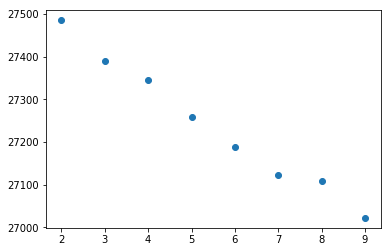

In [41]:
plt.scatter(range(2, 10), wss) # plot wss values for 2-9 clusters

In [42]:
# find relative changes in wss for 2-9 clusters 
np.diff(wss) #differencing

array([-94.72014014, -44.33652431, -87.80380574, -69.31324813,
       -65.45245162, -13.98667859, -87.32801395])

In [43]:
wss #print absolute values for wss

[27485.08319004147,
 27390.36304990611,
 27346.026525593792,
 27258.222719857356,
 27188.909471726878,
 27123.457020106754,
 27109.470341519827,
 27022.142327571783]

The results of applying the elbow method to find an optimum number of clusters for this dataset are inconclusive. There is no clear pivot point on the wss graph. An alternative method - the silhoutte method from skelen.metrics theat measures the quality of the clustering did not provide any consistent results either. So, for the purposes of this assignment I chose the number of clusters = 5.

## Fit the model and make predictions

In [44]:
#Fit the model with 5 clusters
model_5 = KMeans(n_clusters=5, random_state=123, n_jobs=-1)
#Model fitting ... 
model_5.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [45]:
#Make predictions
cluster_labels = model_5.predict(features)

In [46]:
#sample output cluster labels
cluster_labels

array([1, 4, 1, ..., 4, 4, 4])

In [47]:
# see resulting distribution of tweets by clusters
np.bincount(cluster_labels)

array([ 2285,  2287,  1075,  1669, 20422], dtype=int64)

In [48]:
#extract tweets that are grouped in cluster #4 
cluster4_tweets = np.array(tweets_textready)[cluster_labels == 4]
cluster4_tweets

array(['gp workload harm care   bma poll', 'new approach hiv promise',
       'day empty go', ..., 'simple secret great sleep',
       'hot day call refreshing drink whip family figurefriendly sip sweet way cool',
       '  mediterranean volumetrics maybe dash us news best overall diet plan  '],
      dtype='<U5614')

In [49]:
#calculate word frequencies for the cluster #4
wordcount = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(cluster4_tweets)))

In [50]:
# get the top 10 words from the cluster #4
wordcount.most_common(10)

[('get', 1236),
 ('good', 881),
 ('say', 864),
 ('new', 840),
 ('make', 831),
 ('us', 747),
 ('healthtalk', 669),
 ('help', 667),
 ('day', 632),
 ('q', 623)]

In [51]:
#Extract tweets for the cluster # 3
cluster3_tweets = np.array(tweets_textready)[cluster_labels == 3]
cluster3_tweets

array(['coalition undermine nhs   doctor', 'review case nhs manager',
       'nhs labour tory key policy', ...,
       'nhs staff go strike monday   nhsstrike',
       'lord darzis plan improve londoners   nhs',
       'big challenge face department also nhs whole lack money'],
      dtype='<U5614')

In [52]:
#calculate word frequencies for the cluster #3
wordcount3 = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(cluster3_tweets)))
# get the top 10 words from the cluster #3
wordcount3.most_common(10)

[('nhs', 1747),
 ('new', 175),
 ('miss', 164),
 ('patient', 126),
 ('need', 123),
 ('today', 119),
 ('care', 113),
 ('say', 101),
 ('staff', 99),
 ('work', 88)]

In [53]:
#Extract tweets for the cluster # 2
cluster2_tweets = np.array(tweets_textready)[cluster_labels == 2]
cluster2_tweets

array(['guinea declare ebola emergency', 'military worker free ebola',
       'british medic declare free ebola', ...,
       'ebola ice bucket challenge mosttalkedabout facebook topic for  ',
       '  ebola fighters times person year    timepoy',
       'ebola patient dr martin salia dies nebraska hospital   ebola'],
      dtype='<U5614')

In [54]:
#calculate word frequencies for the cluster #2
wordcount2 = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(cluster2_tweets)))
# get the top 10 words from the cluster #2
wordcount2.most_common(10)

[('ebola', 1088),
 ('outbreak', 141),
 ('say', 113),
 ('sierra', 94),
 ('leone', 92),
 ('patient', 92),
 ('vaccine', 90),
 ('case', 89),
 ('us', 80),
 ('liberia', 73)]

In [55]:
#Extract tweets for the cluster # 1
cluster1_tweets = np.array(tweets_textready)[cluster_labels == 1]
cluster1_tweets

array(['breast cancer risk test devise', 'short people heart risk great',
       'strenuous run may bad', ...,
       '  sound like may enjoy good fatburning breakfast',
       'toss turn may hurt marriage',
       'live pets may protect infants allergies'], dtype='<U5614')

In [56]:
#calculate word frequencies for the cluster #1
wordcount1 = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(cluster1_tweets)))
# get the top 10 words from the cluster #1
wordcount1.most_common(10)

[('may', 1109),
 ('cancer', 854),
 ('risk', 508),
 ('study', 212),
 ('help', 183),
 ('say', 148),
 ('new', 132),
 ('breast', 121),
 ('find', 108),
 ('heart', 105)]

In [57]:
#Extract tweets for the cluster # 0
cluster0_tweets = np.array(tweets_textready)[cluster_labels == 0]
cluster0_tweets

array(['unsafe food grow global threat', 'make healthy high street',
       'dr radhas guide healthy diet', ...,
       '  eat healthy accord myplate guideline less   week',
       'hurry hungry heres eat stay slim go courtesy  ',
       'enjoy summer strawberri straight carton shortcake pie healthy recipe'],
      dtype='<U5614')

In [58]:
#calculate word frequencies for the cluster #0
wordcount0 = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(cluster0_tweets)))
# get the top 10 words from the cluster #0
wordcount0.most_common(10)

[('food', 1065),
 ('healthy', 927),
 ('eat', 689),
 ('q', 256),
 ('make', 187),
 ('good', 180),
 ('get', 174),
 ('amp', 166),
 ('healthtalk', 150),
 ('recipe', 128)]

## Topic Modeling Using Latent Semantic Analysis

In [59]:
from sklearn.decomposition import TruncatedSVD

In [60]:
#SVD - vector representation of documents and terms
#n_components parameter specifies the number of topics
#since I originally used 8 files  => n_components=8
svd_model = TruncatedSVD(n_components = 8, algorithm='randomized', n_iter = 100, random_state=123)


In [61]:
#fit the SVD model to the document-term matrix
svd_model.fit(features)

TruncatedSVD(algorithm='randomized', n_components=8, n_iter=100,
       random_state=123, tol=0.0)

In [62]:
#print the most important words for each topic
terms=vectorizer.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:10]
    print('\n',"Topic "+str(i)+":")
    for t in sorted_terms:
        print(t[0], end=' ')
        
        


 Topic 0:
nhs get good food new may make help healthy way 
 Topic 1:
nhs ebola patient new say cancer care miss doctor hospital 
 Topic 2:
nhs day recipe today get miss try care viewsfromthenhsfrontline work 
 Topic 3:
day ebola recipe get us try outbreak healthy vaccine leone 
 Topic 4:
ebola weight lose nhs food eat outbreak loss diet pound 
 Topic 5:
weight lose day recipe help may loss try diet way 
 Topic 6:
food eat good life nhs ebola bad day long recipe 
 Topic 7:
get good way bad workout exercise fitness move ebola via 

## Resources

1. Latent Semantic Analysis Introductory Tutorial: [ww.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/](https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/)

2. KMeans Tutorial: [www.datascience.com/blog/k-means-clustering](https://www.datascience.com/blog/k-means-clustering)